<a href="https://colab.research.google.com/github/sheelaj123/Machine-learning-Demos--2024/blob/main/Regression_IN__ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Machine Learning Course
###By::Sheelaj
####Souces: LEX(Materials)

What is ML?

1.Decision making via oberservation or past data.

2.Science of getting computers to learn and act like human do

How it's works?...?

Input(Past data) ->Training -->Learn from data ->Builing logic(Testing ) ->model---> new data <---->Output

Types of Machine learning..?

1. Supervised ML  (machines are trained using well "labelled" training data, and on basis of that data, machines predict the output. The labelled data means some input data is already tagged with the correct output.)

2. Unsupervised ML (Unsupervised learning is a type of machine learning in which models are trained using unlabeled dataset and are allowed to act on that data without any supervision.)


Types of supervised ML:

1)Regression

2)Classification

Regression:>

Regression algorithms are used if there is a relationship between the input variable and the output variable. It is used for the prediction of continuous variables, such as Weather forecasting, Market Trends, etc.

Classification:>

Classification algorithms are used when the output variable is categorical, which means there are two classes such as Yes-No, Male-Female, True-false, etc.




Types of Regression: --

Linear Regression

Regression Trees

Non-Linear Regression

Bayesian Linear Regression

Polynomial Regression


####################################

Types of Classification:

Random Forest

Decision Trees

Logistic Regression

Support vector Machines

#Regression

In [2]:
# Importing the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
# Reading the data from input csv file into a Pandas DataFrame
computers = pd.read_csv("computers.csv")
# Printing the first 5 rows
computers.head()

,Units,Minutes
0,1,23
1,2,29
2,3,49
3,4,64
4,4,74


####We want to predict 'Minutes' (target) from 'Units' (predictor) value.

In [60]:
mean_value = computers['Minutes'].mean()

In [61]:
mean_value

97.21428571428571

Text(0, 0.5, 'Minutes')

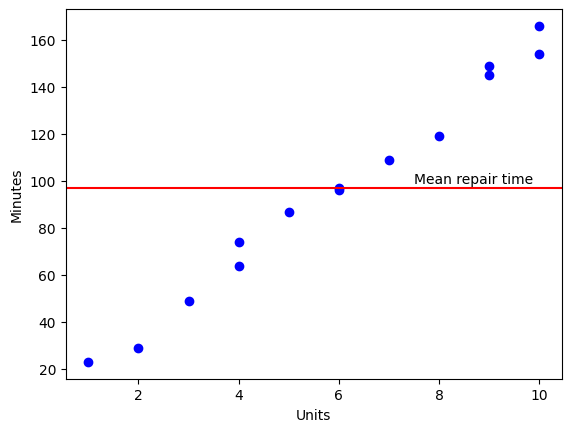

In [3]:
# Calculating the mean.
mean_value = computers['Minutes'].mean()
# Plotting the actual time taken for various values of number of faulty units.
plt.scatter(computers['Units'],computers['Minutes'],color='blue', marker='o')
# Plotting the mean
plt.axhline(y=mean_value,c="r")
# Adding annotation, xlabel and ylabel.
plt.annotate("Mean repair time",xy = (7.5,mean_value+2))
plt.xlabel("Units")
plt.ylabel("Minutes")

####Association between variables

#Creating Regression Models:
Let us speculate a few linear regression models that can predict the value of time taken to repair a computer.

Model 0: Time taken to repair a computer = 97.21 (i.e. mean)

Model 1: Time taken to repair a computer = 10 + (12 * No. of Units being replaced)

Model 2: Time taken to repair a computer = 6 + (18 * No. of Units being replaced)

In [27]:
min_model0 = computers['Minutes'].mean()
min_model1 = 10 + 12*computers['Units']
min_model2 = 6 + 18*computers['Units']
min_mod0_list = [min_model0] * len(computers)

#Visualizing the Speculated Regression Models:


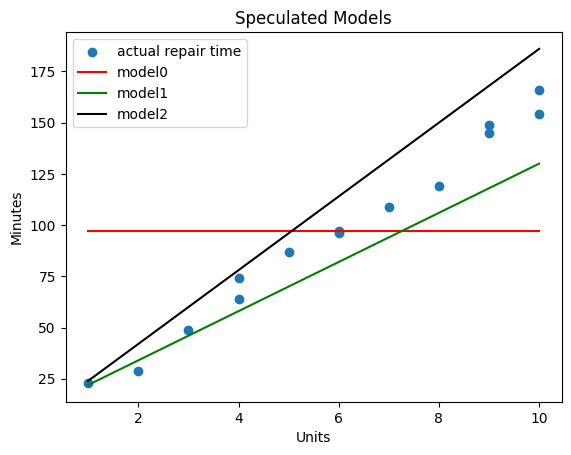

In [63]:
fig,ax = plt.subplots()
# Plotting the actual 'Minutes'
ax.scatter(x="Units",y="Minutes",data=computers,label='actual repair time')
# Plotting the Model0 predictions
ax.plot(computers['Units'],min_mod0_list,color="red",label='model0')
# Plotting the Model1 predictions
ax.plot(computers['Units'],min_model1,color="green",label='model1')
# Plotting the Model2 predictions
ax.plot(computers['Units'],min_model2,color="black",label='model2')
# Adding xlabel, ylabel, title and legend
ax.set_ylabel("Minutes")
ax.set_xlabel("Units")
ax.set_title("Speculated Models")
ax.legend()

#Analyzing the Speculated Models:


In [30]:
# Validating Model0: Estimated time = mean('Minutes')
# Creating a Pandas DataFrame with 'Units', actual 'Minutes', predicted 'Minutes' by Model0, error in prediction by Model0.
model0_obs = pd.DataFrame({"Units":computers['Units'],
"Actual time":computers['Minutes'],
"Predicted time":min_model0,
"Error":(min_model0 - computers['Minutes'])})
model0_obs # Printing the DataFrame

,Units,Actual time,Predicted time,Error
0,1,23,97.214286,74.214286
1,2,29,97.214286,68.214286
2,3,49,97.214286,48.214286
3,4,64,97.214286,33.214286
4,4,74,97.214286,23.214286
5,5,87,97.214286,10.214286
6,6,96,97.214286,1.214286
7,6,97,97.214286,0.214286
8,7,109,97.214286,-11.785714
9,8,119,97.214286,-21.785714


# SSE means-- Sum of Squared Errors
# SSR means-- Sum of Squared Regression
# SST means-- Sum of Squared Total


#Analyzing Model 0

In [31]:
# Sum of errors
print(sum(model0_obs['Error']))

1.4210854715202004e-14


In [32]:
# Sum of squared errors
sum(model0_obs['Error']**2)

27768.357142857145

#Analyzing Model 1

In [39]:
# Creating a Pandas DataFrame with 'Units', actual 'Minutes', predicted 'Minutes' by Model1, error in prediction by Model1.
# Model1: Estimated time = 10 + 12*(#Units) minutes
model1_obs = pd.DataFrame({"Units":computers['Units'],
              "Actual time":computers['Minutes'],
              "Predicted time":min_model1,
              "Error":(min_model1 - computers['Minutes'])})
model1_obs


,Units,Actual time,Predicted time,Error
0,1,23,22,-1
1,2,29,34,5
2,3,49,46,-3
3,4,64,58,-6
4,4,74,58,-16
5,5,87,70,-17
6,6,96,82,-14
7,6,97,82,-15
8,7,109,94,-15
9,8,119,106,-13


In [40]:
# SSE for Model1
sum(model1_obs.Error**2)


4993

#Analyzing Model 2

In [43]:
# Creating a Pandas DataFrame with 'Units', actual 'Minutes', predicted 'Minutes' by Model2, error in prediction by Model2.
# Model2: Estimated time = 6 + 18*(#Units) minutes
model2_obs = pd.DataFrame({"Units":computers['Units'],
              "Actual time":computers['Minutes'],
              "Predicted time":min_model2,
              "Error":(min_model2 - computers['Minutes'])})
model2_obs


,Units,Actual time,Predicted time,Error
0,1,23,24,1
1,2,29,42,13
2,3,49,60,11
3,4,64,78,14
4,4,74,78,4
5,5,87,96,9
6,6,96,114,18
7,6,97,114,17
8,7,109,132,23
9,8,119,150,31


In [44]:
# SSE for Model2
sum(model2_obs.Error**2)


5001

#Finding the Best Fit Model Manually


In [45]:
x = computers.Units
y = computers.Minutes
xiyi = x*y
n = len(computers)
xmean = computers.Units.mean()
ymean = computers.Minutes.mean()
numerator = xiyi.sum() - n*xmean*ymean
denominator = (x**2).sum() - n*(xmean**2)
m = numerator/denominator
c = ymean - (m*xmean)
print('intercept : ',c,' coefficient : ',m)


intercept :  4.161654135338296  coefficient :  15.508771929824569


Estimated time taken to repair a computer = 4.16165 + 15.50877 * Number of faulty units

In [46]:
# Estimating time using the intercept and the coefficient of the best fit model
min_best_fit_model = c + m*computers.Units
# Adding the predicted values to the dataset
computers['min_best_fit_model'] = min_best_fit_model
# Printing the values predicted by the best fit model
computers[["Units","Minutes","min_best_fit_model"]]


,Units,Minutes,min_best_fit_model
0,1,23,19.670426
1,2,29,35.179198
2,3,49,50.687970
3,4,64,66.196742
4,4,74,66.196742
5,5,87,81.705514
6,6,96,97.214286
7,6,97,97.214286
8,7,109,112.723058
9,8,119,128.231830


#Visualizing the Best Fit Model


Text(0.5, 1.0, 'Best fit model line')

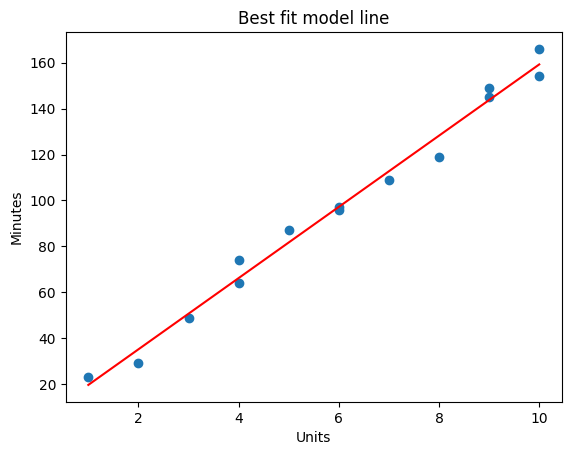

In [47]:
fig,ax = plt.subplots()
# Plotting the actual target values
ax.scatter(x="Units",y="Minutes",data=computers)
# Plotting the target values predicted by the best fit model
ax.plot(computers.Units,computers.min_best_fit_model,color="red")
ax.set_ylabel("Minutes")
ax.set_xlabel("Units")
ax.set_title("Best fit model line")

#Sum of Squared Errors for the Best Fit Model:

In [49]:
# Computing the individual errors for the best fit model
best_fit_model_obs = pd.DataFrame({"Units":computers.Units,
              "Actual time":computers.Minutes,
              "Predicted time":computers.min_best_fit_model,
              "Error":computers.min_best_fit_model - computers.Minutes})
best_fit_model_obs

,Units,Actual time,Predicted time,Error
0,1,23,19.670426,-3.329574
1,2,29,35.179198,6.179198
2,3,49,50.687970,1.687970
3,4,64,66.196742,2.196742
4,4,74,66.196742,-7.803258
5,5,87,81.705514,-5.294486
6,6,96,97.214286,1.214286
7,6,97,97.214286,0.214286
8,7,109,112.723058,3.723058
9,8,119,128.231830,9.231830


In [50]:
# Sum of Squared Errors for the best fit model
sum(best_fit_model_obs.Error**2)


348.848370927318

#Best Fit Model using sklearn.linear_model.LinearRegression

In [51]:
# Setting the 'Units' column as the input data or predictor column
X = computers[['Units']]
# Setting the 'Minutes' column as the output data or target column
y=computers['Minutes']
# Importing the required class
from sklearn.linear_model import LinearRegression
# Creating a linear regression model
model = LinearRegression()
# Fitting the model to the data i.e. building the model
model.fit(X, y)
# Fetching intercept and coefficient
print("Intercept:", model.intercept_)
print("Coefficients:",model.coef_)


Intercept: 4.161654135338296
Coefficients: [15.50877193]


#Evaluation of Regression Model

#Computing the Coefficient of Determination

In [53]:
SST = sum((computers.Minutes.mean() - computers.Minutes)**2)
SST
# 27768.357142857145
SSE = sum(best_fit_model_obs.Error**2)
SSE
# 348.848370927318
SSR = SST - SSE
SSR
# 27419.508771929828
Rsq = SSR/SST
Rsq
# 0.9874371980620736
Rsq1 = model.score(computers[["Units"]],y)
Rsq1


0.9874371980620736

#Simple Linear Regression Excersize:

Exercise:


Use the Boston dataset (Click here to download the Boston dataset) and perform the following activities:

1.    Consider the column, ‘RM’, as predictor, and ‘MEDV’ as the target variable

2.    Visualize the association between the predictor and the target using scatter plot.

3.    Split the data into train and test datasets, in the ratio of 67:33.

4.    Build a Linear Regression model using training dataset, to predict the target variable.

5.    Observe the coefficient and intercept values for the model.

6.    Evaluate the model using mean squared error values and R-squared values on the training and the testing datasets.

##Solution: @@@@

In [66]:
# Importing the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
# Reading the data from input csv file into a Pandas DataFrame
boston_housing = pd.read_csv("boston_housing.csv")
# Printing the first 5 rows
boston_housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


1) Consider the column, ‘RM’, as predictor, and ‘MEDV’ as the target variable

Text(0, 0.5, 'MEDV')

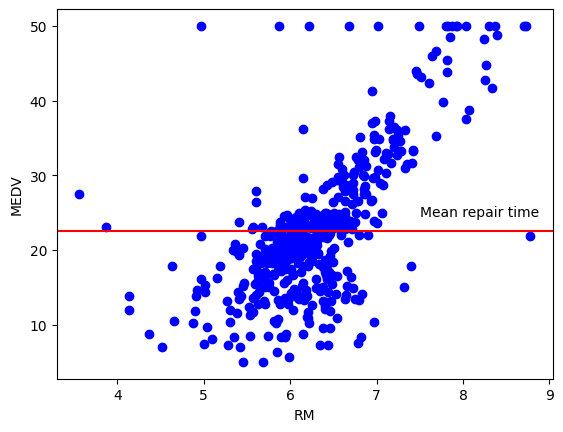

In [67]:
# Calculating the mean.
mean_value = boston_housing['MEDV'].mean()
# Plotting the actual time taken for various values of number of faulty RM.
plt.scatter(boston_housing['RM'],boston_housing['MEDV'],color='blue', marker='o')
# Plotting the mean
plt.axhline(y=mean_value,c="r")
# Adding annotation, xlabel and ylabel.
plt.annotate("Mean repair time",xy = (7.5,mean_value+2))
plt.xlabel("RM")
plt.ylabel("MEDV")

In [68]:
mean_value = boston_housing['MEDV'].mean()

In [69]:
mean_value

22.532806324110677

In [71]:
min_model0 = boston_housing['MEDV'].mean()
min_model1 = 10 + 12*boston_housing['RM']
min_model2 = 6 + 18*boston_housing['RM']
min_mod0_list = [min_model0] * len(boston_housing)

2.  Visualize the association between the predictor and the target using scatter plot.

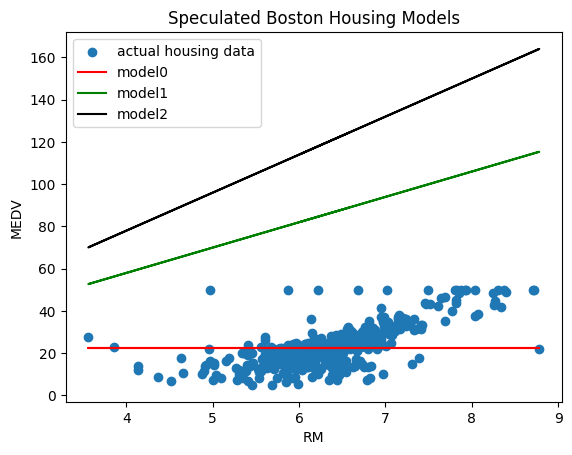

In [74]:
fig,ax = plt.subplots()
# Plotting the actual 'MEDV'
ax.scatter(x="RM",y="MEDV",data=boston_housing,label='actual housing data')
# Plotting the Model0 predictions
ax.plot(boston_housing['RM'],min_mod0_list,color="red",label='model0')
# Plotting the Model1 predictions
ax.plot(boston_housing['RM'],min_model1,color="green",label='model1')
# Plotting the Model2 predictions
ax.plot(boston_housing['RM'],min_model2,color="black",label='model2')
# Adding xlabel, ylabel, title and legend
ax.set_ylabel("MEDV")
ax.set_xlabel("RM")
ax.set_title("Speculated Boston Housing Models")
ax.legend()

#Build a Linear Regression model using training dataset, to predict the target variable.


In [77]:
# Validating Model0: Estimated time = mean('MEDV')
# Creating a Pandas DataFrame with 'RM', actual 'MEDV', predicted 'MEDV' by Model0, error in prediction by Model0.
model0_obs = pd.DataFrame({"RM":boston_housing['MEDV'],
"Actual time":boston_housing['MEDV'],
"Predicted time":min_model0,
"Error":(min_model0 - boston_housing['MEDV'])})
model0_obs # Printing the DataFrame

,RM,Actual time,Predicted time,Error
0,24.0,24.0,22.532806,-1.467194
1,21.6,21.6,22.532806,0.932806
2,34.7,34.7,22.532806,-12.167194
3,33.4,33.4,22.532806,-10.867194
4,36.2,36.2,22.532806,-13.667194
...,...,...,...,...
501,22.4,22.4,22.532806,0.132806
502,20.6,20.6,22.532806,1.932806
503,23.9,23.9,22.532806,-1.367194
504,22.0,22.0,22.532806,0.532806


In [78]:
# Sum of errors
print(sum(model0_obs['Error']))

1.5507595207964187e-12


In [79]:
# Sum of squared errors
sum(model0_obs['Error']**2)

42716.2954150198

#Analyzing Model 1


In [82]:
# Creating a Pandas DataFrame with 'RM', actual 'MEDV', predicted 'MEDV' by Model1, error in prediction by Model1.
# Model1: Estimated time = 10 + 12*(#RM) MEDV
model1_obs = pd.DataFrame({"RM":boston_housing['RM'],
              "Actual time":boston_housing['MEDV'],
              "Predicted time":min_model1,
              "Error":(min_model1 - boston_housing['MEDV'])})
model1_obs


,RM,Actual time,Predicted time,Error
0,6.575,24.0,88.900,64.900
1,6.421,21.6,87.052,65.452
2,7.185,34.7,96.220,61.520
3,6.998,33.4,93.976,60.576
4,7.147,36.2,95.764,59.564
...,...,...,...,...
501,6.593,22.4,89.116,66.716
502,6.120,20.6,83.440,62.840
503,6.976,23.9,93.712,69.812
504,6.794,22.0,91.528,69.528


In [83]:
# SSE for Model1
sum(model1_obs.Error**2)


2025004.6251679994

#Analyze model -2

In [ ]:
# Creating a Pandas DataFrame with 'RM', actual 'MEDV', predicted 'MEDV' by Model2, error in prediction by Model2.
# Model2: Estimated time = 6 + 18*(#RM) MEDV
model2_obs = pd.DataFrame({"Rm":boston_housing['RM'],
              "Actual time":boston_housing['MEDV'],
              "Predicted time":min_model2,
              "Error":(min_model2 - boston_housing['MEDV'])})
model2_obs


In [84]:
# SSE for Model1
sum(model2_obs.Error**2)

5001

#Finding the Best Fit Model Manually

In [86]:
x = boston_housing.RM
y = boston_housing.MEDV
xiyi = x*y
n = len(boston_housing)
xmean = boston_housing.RM.mean()
ymean = boston_housing.MEDV.mean()
numerator = xiyi.sum() - n*xmean*ymean
denominator = (x**2).sum() - n*(xmean**2)
m = numerator/denominator
c = ymean - (m*xmean)
print('intercept : ',c,' coefficient : ',m)


intercept :  -34.67062077643811  coefficient :  9.102108981180239


In [90]:
# Estimating time using the intercept and the coefficient of the best fit model
min_best_fit_model = c + m*boston_housing.RM
# Adding the predicted values to the dataset
boston_housing['min_best_fit_model'] = min_best_fit_model
# Printing the values predicted by the best fit model
boston_housing[["RM","MEDV","min_best_fit_model"]]


,RM,MEDV,min_best_fit_model
0,6.575,24.0,25.175746
1,6.421,21.6,23.774021
2,7.185,34.7,30.728032
3,6.998,33.4,29.025938
4,7.147,36.2,30.382152
...,...,...,...
501,6.593,22.4,25.339584
502,6.120,20.6,21.034286
503,6.976,23.9,28.825691
504,6.794,22.0,27.169108


#Visualizing the Best Fit Model

Text(0.5, 1.0, 'Best fit model line')

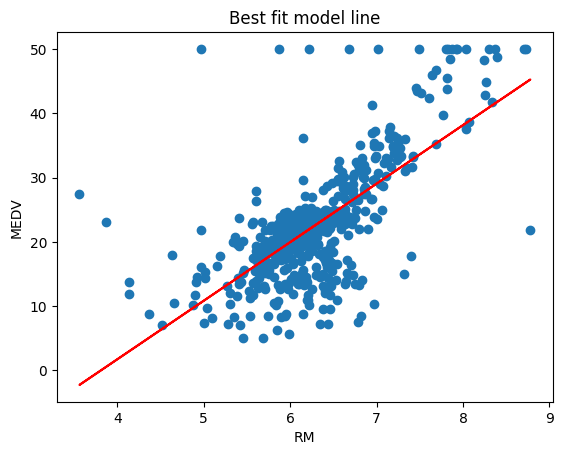

In [92]:
fig,ax = plt.subplots()
# Plotting the actual target values
ax.scatter(x="RM",y="MEDV",data=boston_housing)
# Plotting the target values predicted by the best fit model
ax.plot(boston_housing.RM,boston_housing.min_best_fit_model,color="red")
ax.set_ylabel("MEDV")
ax.set_xlabel("RM")
ax.set_title("Best fit model line")


# Evaluate the model using mean squared error values and R-squared values on the training and the testing datasets.

In [93]:
# Computing the individual errors for the best fit model
best_fit_model_obs = pd.DataFrame({"RM":boston_housing.RM,
              "Actual time":boston_housing.MEDV,
              "Predicted time":boston_housing.min_best_fit_model,
              "Error":boston_housing.min_best_fit_model - boston_housing.MEDV})
best_fit_model_obs


,RM,Actual time,Predicted time,Error
0,6.575,24.0,25.175746,1.175746
1,6.421,21.6,23.774021,2.174021
2,7.185,34.7,30.728032,-3.971968
3,6.998,33.4,29.025938,-4.374062
4,7.147,36.2,30.382152,-5.817848
...,...,...,...,...
501,6.593,22.4,25.339584,2.939584
502,6.120,20.6,21.034286,0.434286
503,6.976,23.9,28.825691,4.925691
504,6.794,22.0,27.169108,5.169108


In [94]:
# Sum of Squared Errors for the best fit model
sum(best_fit_model_obs.Error**2)

22061.87919621179

#Observe the coefficient and intercept values for the model.

In [95]:
# Setting the 'RM' column as the input data or predictor column
X = boston_housing[['RM']]
# Setting the 'MEDV' column as the output data or target column
y=boston_housing['MEDV']
# Importing the required class
from sklearn.linear_model import LinearRegression
# Creating a linear regression model
model = LinearRegression()
# Fitting the model to the data i.e. building the model
model.fit(X, y)
# Fetching intercept and coefficient
print("Intercept:", model.intercept_)
print("Coefficients:",model.coef_)


Intercept: -34.67062077643857
Coefficients: [9.10210898]


Hence the value is :

Intercept: -34.67062077643857

Coefficients: [9.10210898]